# Monadické operace
Interaktivní demonstrace úpravy jasu a kontastu, gamma korekce, ekvalizace histogramu a CLAHE. Slouží jako podpůrný materiál k přednášce [Předzpracování obrazu - Transformace a korekce](https://courses.fit.cvut.cz/BI-SVZ/lectures/files/bi-svz-06-metody-predzpracovani-obrazu-1.pdf).

Pro funkčnost interaktivních sliderů je nutné stáhnout a spustit jupyter notebook `index.ipynb`, který je k dispozici na BI-SVZ Gitlabu uvnitř adresáře [showroom](https://gitlab.fit.cvut.cz/bi-svz/bi-svz/-/tree/master/showroom/monadic_operations?ref_type=heads). Při spuštění notebooku se vám zobrazí dva výstupy, jeden interaktivní a jeden statický pro Course pages vizualizaci. Statický výstup jednoduše zakomentujte.


In [1]:
# import needed libraries and functions
%run library.py

In [2]:
# load image, you can try out rentgen.jpg or cells.png
img = to_gray(load_image('data/rentgen.jpg'))

### Vizualizace úprava jasu a kontrastu

interactive(children=(IntSlider(value=0, continuous_update=False, description='Brightness:\xa0\xa0\xa0\xa0\xa0…

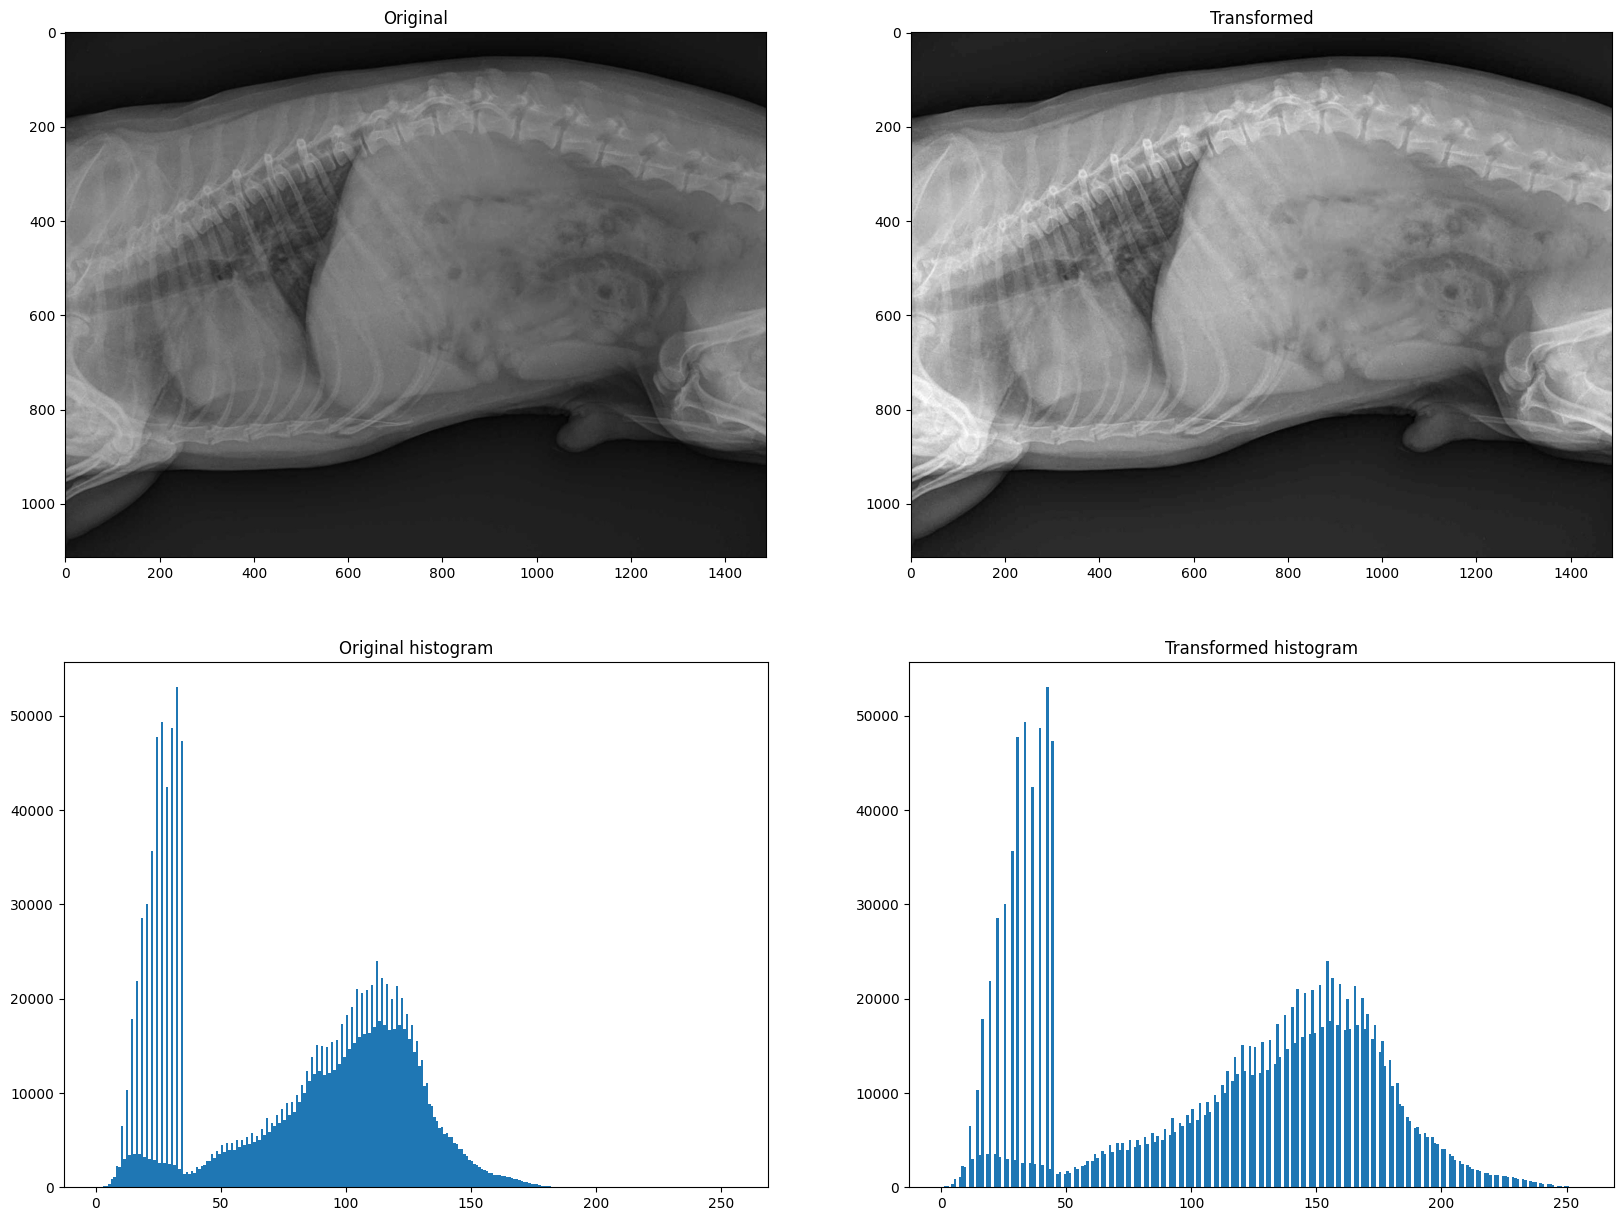

In [3]:
@widgets.interact(brightness_coef=create_slider(min=-255, max=255,default = 0, description='Brightness:',),
                  contrast_coef=create_slider(min=0, max=5, default = 1,description='Contrast:',slider_type = 'float',))
def brightness_contrast(brightness_coef,contrast_coef):
    
    # transform img by applying brightness and contrast transformation, clip values to [0, 255]
    img_transformed = np.clip(contrast_coef * (img.astype(int) + brightness_coef), 0, 255).astype(np.uint8)
    
    # plot original and transformed image and their histograms
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(20, 15)
    axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title('Original')
    axs[0, 1].imshow(img_transformed,cmap='gray', vmin=0, vmax=255)
    axs[0, 1].set_title('Transformed')
    axs[1, 0].hist(img.flatten(),256,[0,256],color = None)
    axs[1, 0].set_title('Original histogram')
    axs[1, 1].hist(img_transformed.flatten(),256,[0,256],color = None)
    axs[1, 1].set_title('Transformed histogram')
    plt.show()

# brightness_coef = -2, contrast_coef = 1.4 are just some example values, for course pages visualization
brightness_contrast(brightness_coef = -2,contrast_coef=1.4) # comment this line if you want to just use sliders without visualizing twice

### Gamma korekce

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Gamma:\xa0\xa0\xa0\xa0\xa0\…

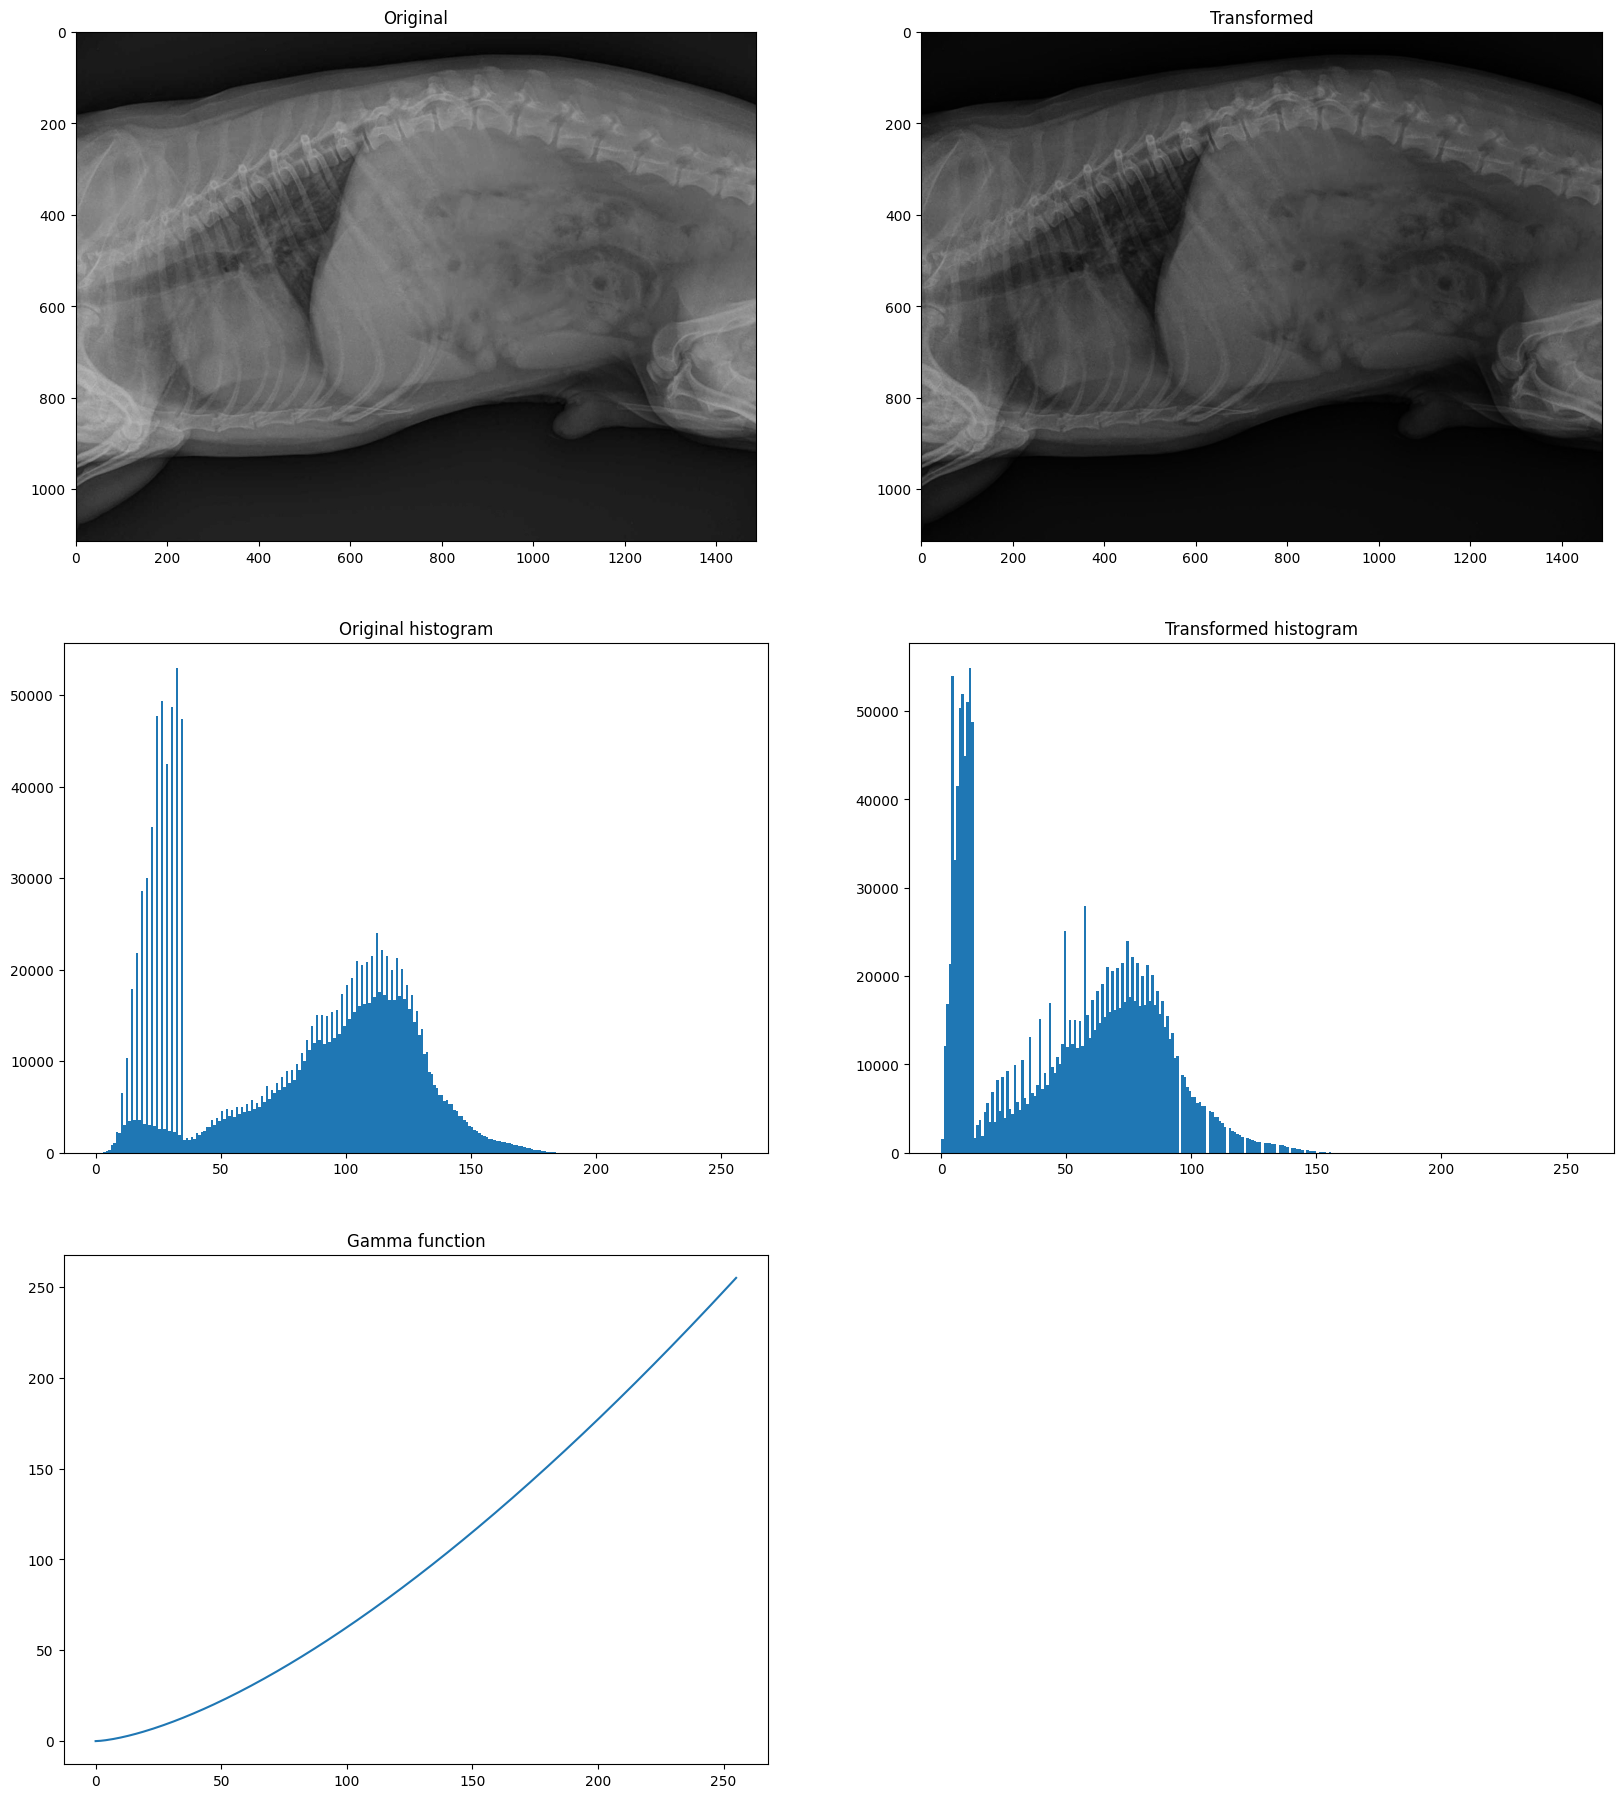

In [4]:
@widgets.interact(gamma_coef=create_slider(min=0.01, max=25,default = 1, description='Gamma:',slider_type = 'float',))
def gamma_correct(gamma_coef):
    # define gamma transformation
    def gamma_transform(x, gamma):
        return ((x/255)**gamma)*255
    
    # transform img by applying gamma transformation
    img_transformed = gamma_transform(img, gamma_coef)
    
    # gamma function 
    x = np.linspace(0, 255, 256)
    y = gamma_transform(x, gamma_coef)
    
    # plot original and transformed image, their histograms and gamma function
    fig, axs = plt.subplots(3,2)
    fig.set_size_inches(20, 22.5)
    axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title('Original')
    axs[0, 1].imshow(img_transformed,cmap='gray', vmin=0, vmax=255)
    axs[0, 1].set_title('Transformed')
    axs[1, 0].hist(img.flatten(),256,[0,256],color = None)
    axs[1, 0].set_title('Original histogram')
    axs[1, 1].hist(img_transformed.flatten(),256,[0,256],color = None)
    axs[1, 1].set_title('Transformed histogram')
    axs[2, 0].plot(x, y)
    axs[2, 0].set_title('Gamma function')
    axs[2, 1].axis('off')
    plt.show()

# gamma_coef = 1.5, is just example values, for course pages visualization
gamma_correct(gamma_coef=1.5) # comment this line if you want to just use sliders without visualizing twice

### Equalizace histogramu

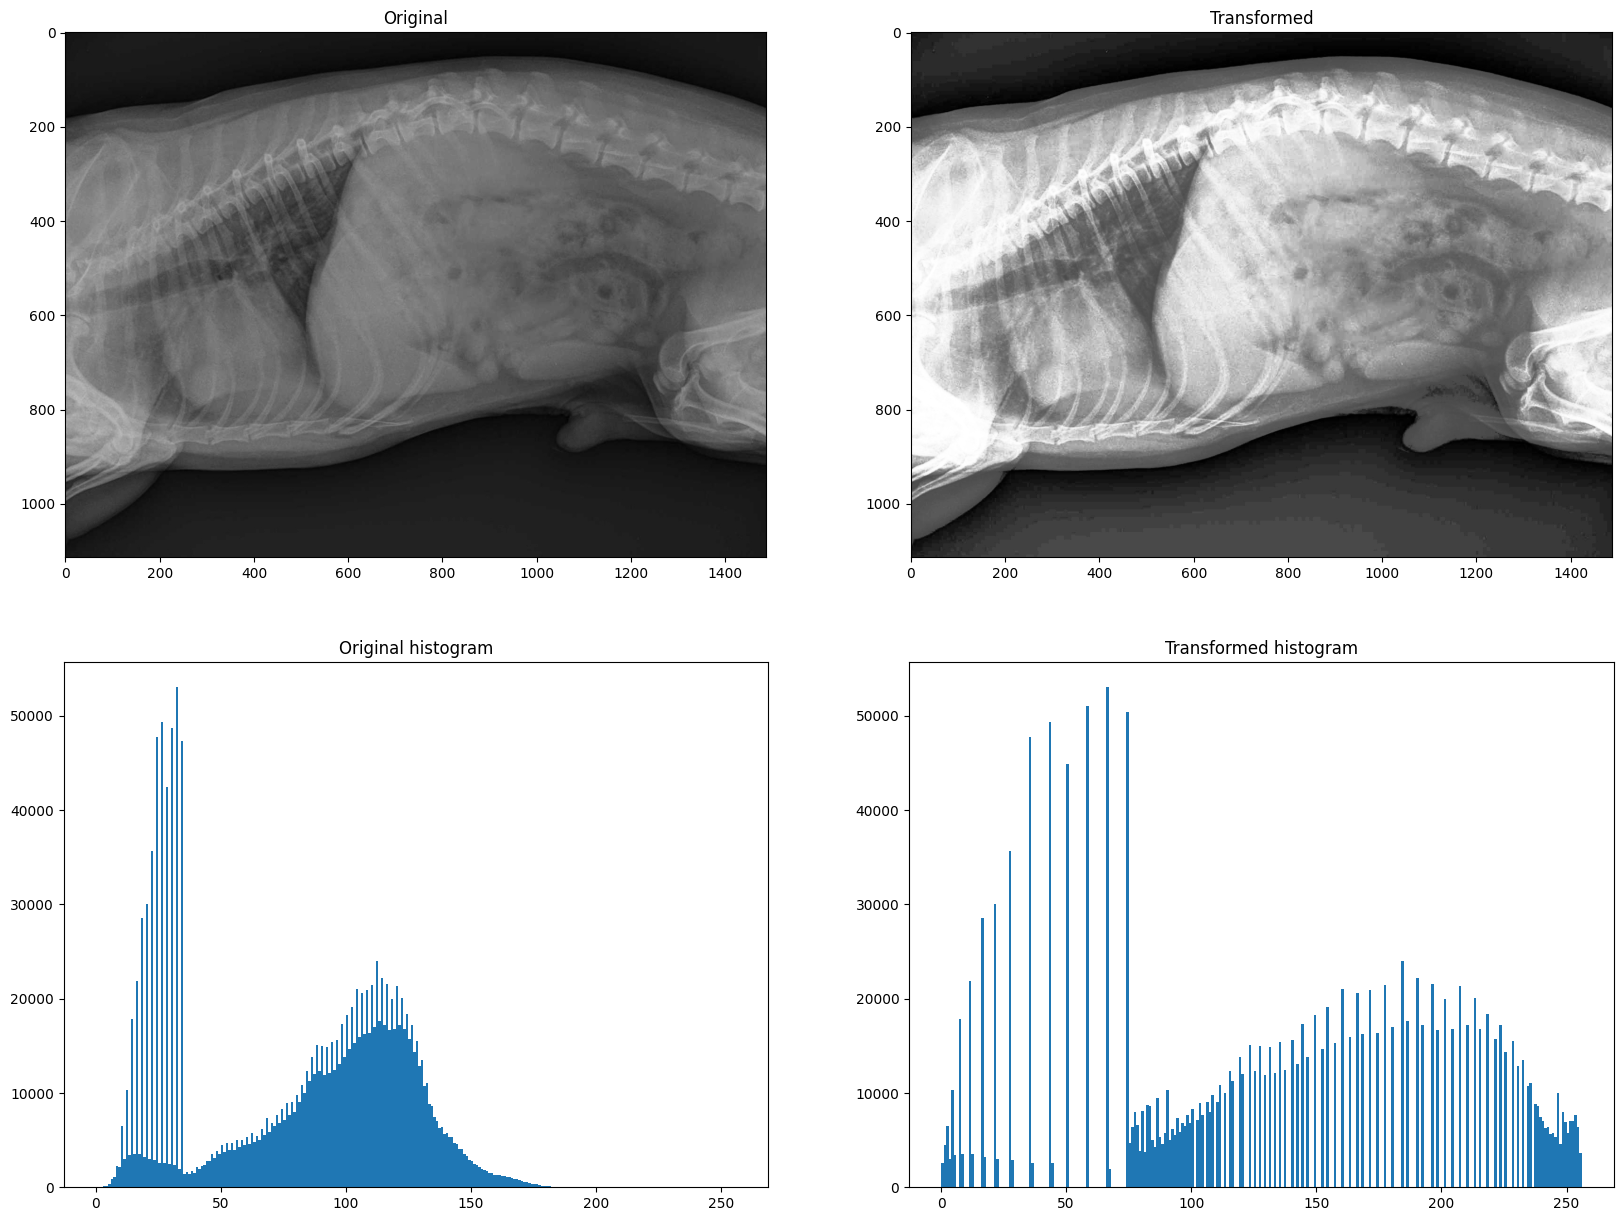

In [5]:
# use cv2.equalizeHist function to equalize histogram of img
img_transformed = cv2.equalizeHist(img)

# plot original and transformed image and their histograms
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 15)
axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(img_transformed,cmap='gray', vmin=0, vmax=255)
axs[0, 1].set_title('Transformed')
axs[1, 0].hist(img.flatten(),256,[0,256],color = None)
axs[1, 0].set_title('Original histogram')
axs[1, 1].hist(img_transformed.flatten(),256,[0,256],color = None)
axs[1, 1].set_title('Transformed histogram')
plt.show()

### CLAHE

interactive(children=(IntSlider(value=8, continuous_update=False, description='Window size:\xa0\xa0\xa0\xa0\xa…

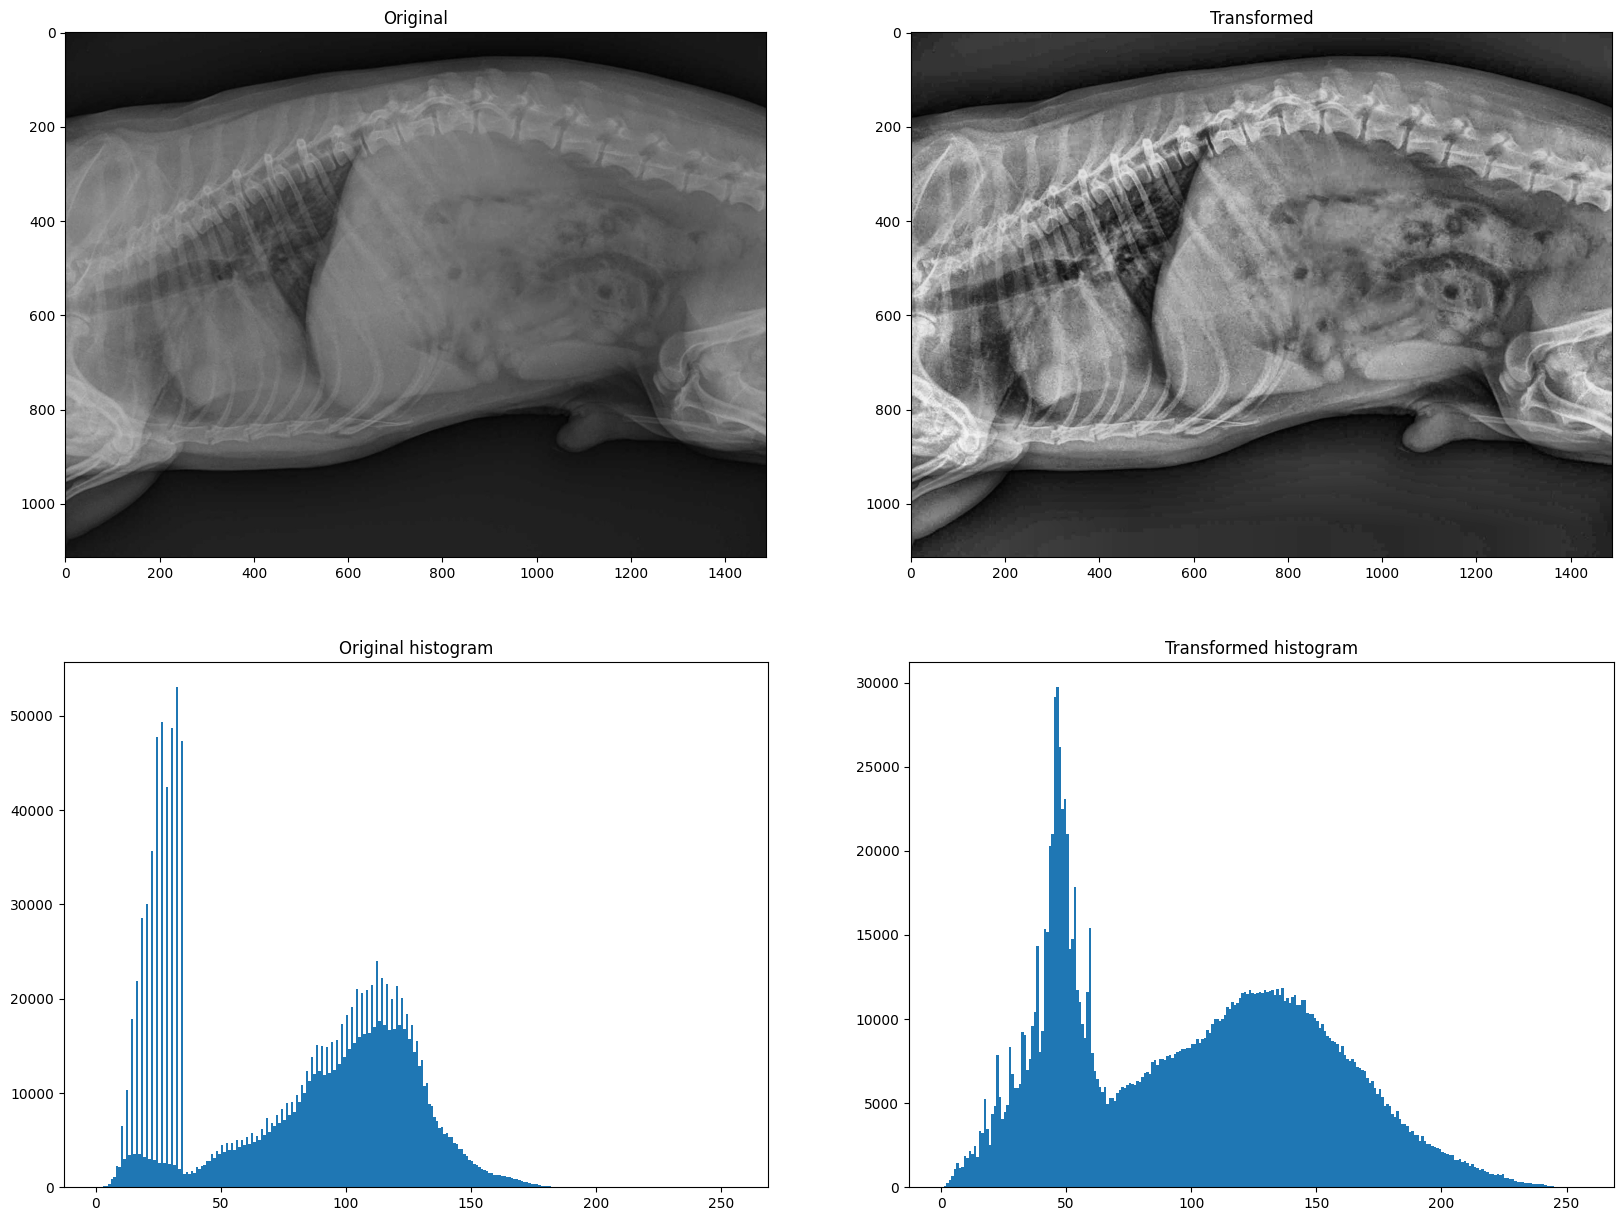

In [6]:
@widgets.interact(window_size=create_slider(min=0, max=20,default = 8, description='Window size:',),
                  clip_limit=create_slider(min=0, max=100, default = 2,description='Clip limit:',slider_type = 'float',))
def clahe(window_size,clip_limit):
    
    # use cv2.createCLAHE function to equalize histogram of img
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=(window_size,window_size))
    img_transformed = clahe.apply(img)

    # plot original and transformed image and their histograms
    fig, axs = plt.subplots(2, 2)
    fig.set_size_inches(20, 15)
    axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
    axs[0, 0].set_title('Original')
    axs[0, 1].imshow(img_transformed,cmap='gray', vmin=0, vmax=255)
    axs[0, 1].set_title('Transformed')
    axs[1, 0].hist(img.flatten(),256,[0,256],color = None)
    axs[1, 0].set_title('Original histogram')
    axs[1, 1].hist(img_transformed.flatten(),256,[0,256],color = None)
    axs[1, 1].set_title('Transformed histogram')
    plt.show()  
    
# window_size = 8, clip_limit = 3 are just some example values, for course pages visualization
clahe(window_size=8,clip_limit=3) # comment this line if you want to just use sliders without visualizing twice